In [1]:
import cv2
import numpy as np
import scipy.io

#        8   12  16  20
#        |   |   |   |
#        7   11  15  19
#    4   |   |   |   |
#    |   6   10  14  18
#    3   |   |   |   |
#    |   5---9---13--17
#    2    \         /
#     \    \       /
#      1    \     /
#       \    \   /
#        ------0-
connections = [
    (0, 1), (1, 2), (2, 3), (3, 4),
    (5, 6), (6, 7), (7, 8),
    (9, 10), (10, 11), (11, 12),
    (13, 14), (14, 15), (15, 16),
    (17, 18), (18, 19), (19, 20),
    (0, 5), (5, 9), (9, 13), (13, 17), (0, 17)
]

mat = scipy.io.loadmat("keypoint_gestures.mat")
keypoints = mat["keypoints"]
labels = mat["labels"]

def visualize(points, resolution=(480, 640, 3)):
    img = np.zeros(resolution)
    for point in points:
        x, y = point
        cv2.circle(img, (int(x) * 2, int(y) * 2), 4, (255, 0, 0), 2)
    for connection in connections:
        x0, y0 = points[connection[0]]
        x1, y1 = points[connection[1]]
        cv2.line(img, (int(x0) * 2, int(y0) * 2), (int(x1) * 2, int(y1) * 2), (0, 255, 0), 2)
    cv2.imshow("Key Points", img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [2]:
visualize(keypoints[1])

In [9]:
len(mat['keypoints'])
len(labels[0])

29282

## Test train split

In [18]:
from sklearn.model_selection import train_test_split

In [49]:
X = mat['keypoints']
x, y, z = np.shape(X)
X = X.reshape((x, y * z))
y = labels[0]

In [50]:
# Train, test sets split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest

In [137]:
from sklearn.ensemble import RandomForestClassifier
from matplotlib.legend_handler import HandlerLine2D
import matplotlib.pyplot as plt

### Tuning n_estimators

In [112]:
# Preparing of a list of n_estimators values to tune
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]

In [133]:
# Loop through the list of estimators to obtain the accuracies
train_accuracies = []
test_accuracies = []
for estimator in n_estimators:
    # Initialize a random forest classifier
    rf_clf = RandomForestClassifier(n_estimators=estimator)
    
    # Start training
    rf_inst = rf_clf.fit(X_train, y_train)
    
    # Obtaining training accuracy
    train_acc = rf_inst.score(X_train, y_train)
    train_accuracies.append(train_acc)
    
    # Obtaining testing accuracy
    test_acc = rf_inst.score(X_test, y_test)
    test_accuracies.append(test_acc)
    
    # Report training stats
    print("Training for estimator = {} done, train accy = {}, test accy = {}".format(estimator, train_acc, test_acc))

Training for estimator = 1 done, train accy = 0.8870437566702242, test accy = 0.6962608844118149
Training for estimator = 2 done, train accy = 0.8842689434364994, test accy = 0.697114563769848
Training for estimator = 4 done, train accy = 0.9709711846318037, test accy = 0.794434010585624
Training for estimator = 8 done, train accy = 0.9936392742796158, test accy = 0.833532525183541
Training for estimator = 16 done, train accy = 0.9994450373532551, test accy = 0.856752603722042
Training for estimator = 32 done, train accy = 1.0, test accy = 0.8687041147345057
Training for estimator = 64 done, train accy = 1.0, test accy = 0.8774116441864436
Training for estimator = 100 done, train accy = 1.0, test accy = 0.8770701724432304
Training for estimator = 200 done, train accy = 1.0, test accy = 0.8779238518012634


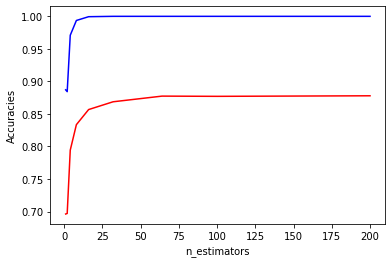

In [140]:
line1, = plt.plot(n_estimators, train_accuracies, 'b')
line2, = plt.plot(n_estimators, test_accuracies, 'r')
plt.ylabel('Accuracies')
plt.xlabel('n_estimators')
plt.show()

### Tuning max_depth

In [146]:
# Prepare a list of depth values
depths = np.linspace(1, 32, 32, endpoint=True)

In [148]:
# Loop through the list of depth values to obtain the accuracies
train_accuracies = []
test_accuracies = []
for max_depth in depths:
    # Initialize a random forest classifier
    rf_clf = RandomForestClassifier(max_depth=max_depth)
    
    # Start training
    rf_inst = rf_clf.fit(X_train, y_train)
    
    # Obtaining training accuracy
    train_acc = rf_inst.score(X_train, y_train)
    train_accuracies.append(train_acc)
    
    # Obtaining testing accuracy
    test_acc = rf_inst.score(X_test, y_test)
    test_accuracies.append(test_acc)
    
    # Report training stats
    print("Training for max_depth = {} done, train accy = {}, test accy = {}".format(max_depth, train_acc, test_acc))

Training for estimator = 1.0 done, train accy = 0.21771611526147278, test accy = 0.21256616015024757
Training for estimator = 2.0 done, train accy = 0.3297331910352188, test accy = 0.3267884582550794
Training for estimator = 3.0 done, train accy = 0.4311632870864461, test accy = 0.4319617551647601
Training for estimator = 4.0 done, train accy = 0.5165421558164355, test accy = 0.5183541061977122
Training for estimator = 5.0 done, train accy = 0.5786552828175027, test accy = 0.5717944340105856
Training for estimator = 6.0 done, train accy = 0.656478121664888, test accy = 0.6382106880655626
Training for estimator = 7.0 done, train accy = 0.7016008537886873, test accy = 0.6732115417449206
Training for estimator = 8.0 done, train accy = 0.7534258271077908, test accy = 0.71623698138979
Training for estimator = 9.0 done, train accy = 0.8025613660618997, test accy = 0.7497012122246884
Training for estimator = 10.0 done, train accy = 0.8536606189967982, test accy = 0.7778726310397814
Training f

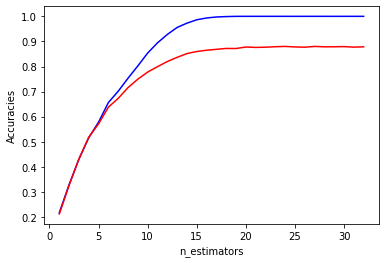

In [149]:
line1, = plt.plot(depths, train_accuracies, 'b')
line2, = plt.plot(depths, test_accuracies, 'r')
plt.ylabel('Accuracies')
plt.xlabel('n_estimators')
plt.show()

### Final Training

In [175]:
n_estimator = 100
max_depth = 20

In [176]:
# Initialize a random forest classifier
rf_clf = RandomForestClassifier(max_depth=max_depth, n_estimators=n_estimator)
    
# Start training
rf_inst = rf_clf.fit(X_train, y_train)

# Get prediction accuracy
rf_inst.score(X_test, y_test)

0.8782653235444767